<a href="https://colab.research.google.com/github/jeftersantiago/complex_networks/blob/master/projects/Task%2006/Task%206%20-%20Network%20models%20-%20Barabasi-Albert%20and%20Configuration%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jefter Santiago Mares

12559016

jefter@usp.br



# Packages


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from scipy.stats import pearsonr
from random import randint

# Functions

In [ ]:
def degree_distribution(g): 
  vk = list(dict(g.degree()).values())
  maxk = np.max(vk)
  
  kvals = np.arange(0, maxk + 1)
  pk = np.zeros(maxk + 1)
  for k in vk:
    pk[k] = pk[k] + 1
  pk = pk/sum(pk)
  return kvals, pk

In [ ]:
def plot_degree_distribution(g, title):
  ks, pk = degree_distribution(g)
  plt.figure()
  plt.loglog(ks, pk, 'bo')
  plt.xlabel("K", fontsize = 20)
  plt.ylabel("P(K)", fontsize = 20)
  plt.title(title, fontsize = 25)
  plt.grid(True)
  plt.show()

In [ ]:
def momment_of_degree_distribution(g,m):
    k,pk = degree_distribution(g)
    X = sum((k**m)*pk)
    return X

In [ ]:
# Shannon Entropy of the degree distribution.
def H(G):
  vk, pk = degree_distribution(G)
  H = 0
  for p in pk:
    if(p>0):
      H -= + p*np.log2(p)
  return H

# 1 - Average clustering and 2nd moment of distribution of an BA network
$\langle k \rangle = 10$ and $N = 1000$

In [ ]:
N = 1000
k = 10
k = int(k/2)

g = nx.barabasi_albert_graph(N, k)

In [ ]:
print("Number of nodes = ", len(g))
print("Number of edges = ", g.number_of_edges())
print("Average degree = ", 2 * g.number_of_edges() / len(g))

Number of nodes =  1000
Number of edges =  4975
Average degree =  9.95


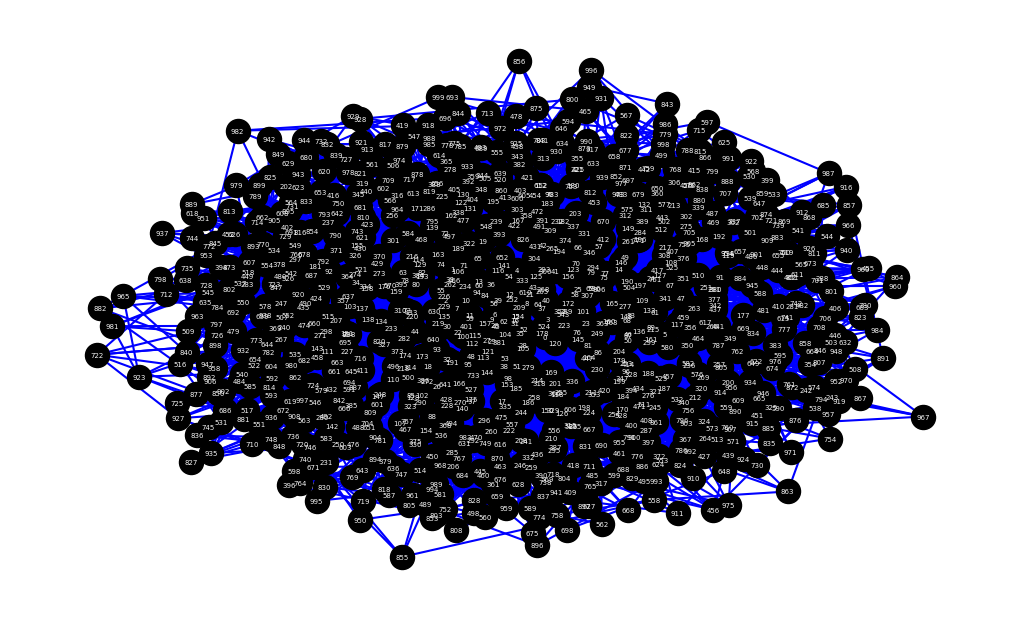

In [ ]:
pos=nx.spring_layout(g)
fig=plt.figure(figsize=(10,6))
nx.draw(g, with_labels = True, node_color = 'black', node_size = 300, font_size = 5, font_color="whitesmoke", pos=pos, width= 1.5 , edge_color="b")
plt.show()

In [ ]:
ks, pk = degree_distribution(g)

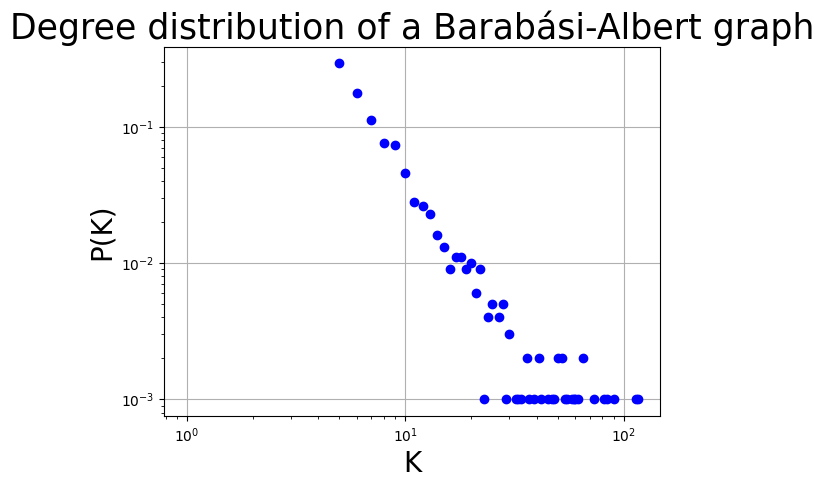

In [ ]:
plot_degree_distribution(g, "Degree distribution of a Barabási-Albert graph")

In [ ]:
cc = nx.average_clustering(g)
k2 = momment_of_degree_distribution(g, 2)

print("cc = ", "%3.2f"%cc)
print("<k²> = ", "%3.2f"%k2)

cc =  0.04
<k²> =  204.23


# 2 - Shannon Entropy for Barabási-Albert and Erdos-Renyi networks

$ \langle k \rangle = 10 $ and $ N = 1000$.


For the `ER` graph $p = \frac{\langle k \rangle}{N - 1}$

In [ ]:
N = 1000
k = 10
p = k / (N - 1)

er = nx.gnp_random_graph(N, p, seed = None, directed = False)

k = int(k/2)
ba = nx.barabasi_albert_graph(N, k)

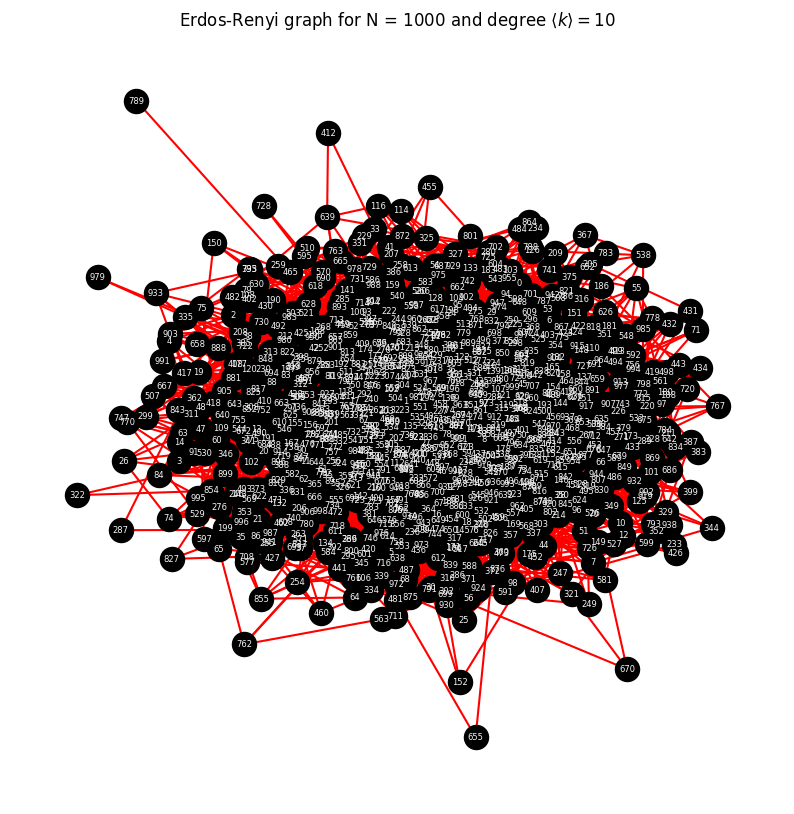

In [ ]:
pos=nx.spring_layout(er)
fig=plt.figure(figsize=(10,10))
plt.title("Erdos-Renyi graph for N = 1000 and degree $\\langle k \\rangle = 10$")
nx.draw(er, with_labels = True, node_color = 'black', node_size = 300, font_size = 6, font_color="whitesmoke", pos=pos, width= 1.5 , edge_color="red")
plt.show()

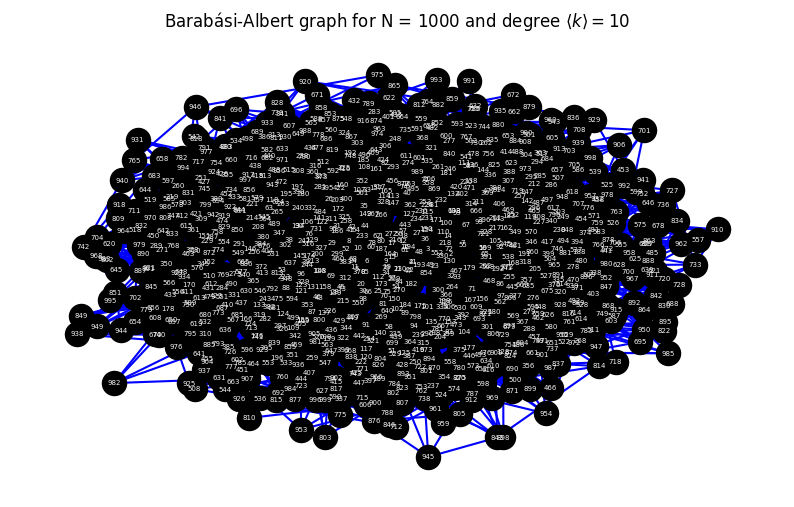

In [ ]:
pos=nx.spring_layout(ba)
fig=plt.figure(figsize=(10,6))
plt.title("Barabási-Albert graph for N = 1000 and degree $\\langle k \\rangle = 10$")
nx.draw(ba, with_labels = True, node_color = 'black', node_size = 300, font_size = 5, font_color="whitesmoke", pos=pos, width= 1.5 , edge_color="b")
plt.show()

Shannon Entropy of degree distribution for each network:

In [ ]:
print("H(AB) = ", "%3.1f"%H(ba))
print("H(ER) = ", "%3.1f"%H(er))

H(AB) =  3.6
H(ER) =  3.6


# Correlation between degree and eigenvector centrality for a Barabási-Albert graph

In [ ]:
N = 1000
k = 10
k = int(k/2)
g = nx.barabasi_albert_graph(N, k)

In [ ]:
eigen_centrality = np.array(list(dict(nx.eigenvector_centrality(g)).values()))
ks = np.array(list(dict(g.degree()).values()))

In [ ]:
print(len(eigen_centrality))
print(len(ks))

1000
1000


Correlation between Eigenvector Centrality and Degree:

In [ ]:
corrp, p_value = pearsonr(ks, eigen_centrality)
print("Corr = ", "%3.2f"%corrp)

Corr =  0.93


# Correlation between degree and betweenness centrality of a Barabasi-Albert graph

In [ ]:
N = 500
k = 10
k = int(k/2)

g = nx.barabasi_albert_graph(N, k)
betweenness_centrality = np.array(list(dict(nx.betweenness_centrality(g)).values()))
ks = np.array(list(dict(g.degree()).values()))

In [ ]:
corrp, p_value = pearsonr(ks, betweenness_centrality)
print("Corr = ", "%3.2f"%corrp)

Corr =  0.96


# Momment of degree distribution for the configuration model


In [ ]:
def k2_configuration_model(n = 100):
  a = 3 
  N = 500
  k2 = 0
  g = nx.empty_graph(500)
  for i in range(100):
    seq = np.random.zipf(a, N) #Zipf distribution
    # ensures that the sum of degrees are even
    if(sum(seq)%2 != 0): 
      pos = randint(0, len(seq))
      seq[pos] = seq[pos]+ 1

    g = nx.configuration_model(seq)
    gcc = sorted(nx.connected_components(g), key=len, reverse = True)
    g = g.subgraph(gcc[0])

    k2 += momment_of_degree_distribution(g, 2)

  return g, k2/n

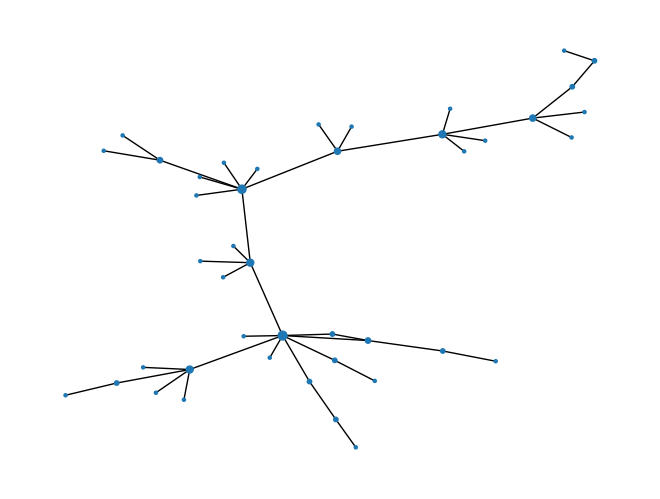

In [ ]:
g, k2 = k2_configuration_model(100)

keys = list(dict(g.degree()).keys())
vals = list(dict(g.degree()).values())

nx.draw(g, nodelist=keys, node_size=[v * 5 for v in vals])
plt.show()

Second momment of distribution for the configuration model graph:

In [ ]:
print("<k²> = ", "%3f"%k2)

<k²> =  14.532850
